# -- ETDUE DE CAS: -- LA PREVISION DE CROISSANCE ET CLIMAT DES AFFAIRES.

In [257]:
                                                            ## L'importation des différentes bibliothèques ##
import os
import warnings
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
register_matplotlib_converters()
import seaborn as sns
#import statsmodels as stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
import sklearn as skn
warnings.filterwarnings('ignore')

In [258]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## -- STEP 1 : Description de l’évolution de la croissance.

### -- Question 1. La base de données " GDP_UK.csv " contient la série trimestrielle du PIB en volumes chaînés (base 2010) de l’Angleterre de 1990 à 2020 (voir le dictionnaire des variables en annexe). Créez un répertoire de travail dans votre logiciel de travail et ouvrez la base.

In [259]:
GDP_UK = pd.read_excel('GDP_UK.xls')

In [260]:
quarter = []
year = []

for i in range(len(GDP_UK['time'])):
    quarter.append(GDP_UK['time'][i].split("Q")[1])
    year.append(GDP_UK['time'][i].split("Q")[0])

GDP_UK["quarter"] = quarter
GDP_UK["year"] = year


In [261]:
dates_true = []
trimestre = list(GDP_UK["quarter"].unique())

for i in list(GDP_UK["quarter"]):
    
    if i == trimestre[0]:
        
        dates_true.append("31")
        
    if i == trimestre[1]:
        
        dates_true.append("30")
        
    if i == trimestre[2]:
        
        
        dates_true.append("30")
        
    if i == trimestre[3]:
        
        dates_true.append("31")

In [262]:
GDP_UK["quarter"][GDP_UK["quarter"] == '1'] = str('03')
GDP_UK["quarter"][GDP_UK["quarter"] == '2'] = str('06')
GDP_UK["quarter"][GDP_UK["quarter"] == '3'] = str('09')
GDP_UK["quarter"][GDP_UK["quarter"] == '4'] = str('12')
GDP_UK["day"] = dates_true
GDP_UK['date'] = GDP_UK["year"].astype(str)  + GDP_UK["quarter"].astype(str) + GDP_UK["day"].astype(str)
GDP_UK['date'] = pd.to_datetime(GDP_UK['date'])
GDP_UK.head(n=4)

,time,geo,unit,s_adj,na_item,value,quarter,year,day,date
0,1975Q1,Royaume-Uni,"Volumes chaînés (2010), millions d'euros",Données désaisonnalisées et corrigées des effe...,Produit intérieur brut aux prix du marché,210301.5,03,1975,31,1975-03-31
1,1975Q2,Royaume-Uni,"Volumes chaînés (2010), millions d'euros",Données désaisonnalisées et corrigées des effe...,Produit intérieur brut aux prix du marché,206847.8,06,1975,30,1975-06-30
2,1975Q3,Royaume-Uni,"Volumes chaînés (2010), millions d'euros",Données désaisonnalisées et corrigées des effe...,Produit intérieur brut aux prix du marché,206140.4,09,1975,30,1975-09-30
3,1975Q4,Royaume-Uni,"Volumes chaînés (2010), millions d'euros",Données désaisonnalisées et corrigées des effe...,Produit intérieur brut aux prix du marché,208504.0,12,1975,31,1975-12-31


In [263]:
GDP_UK["s_adj"].unique()

array(['Données désaisonnalisées et corrigées des effets de calendrier'],
      dtype=object)

In [264]:
GDP_UK.to_csv('series.csv', header = True)

In [265]:
GDP_UK_1 = GDP_UK.loc[:,["value","date"]]
GDP_UK_1 = GDP_UK_1.set_index('date')

### -- Question 2. Tracez l’évolution du PIB dans le temps.

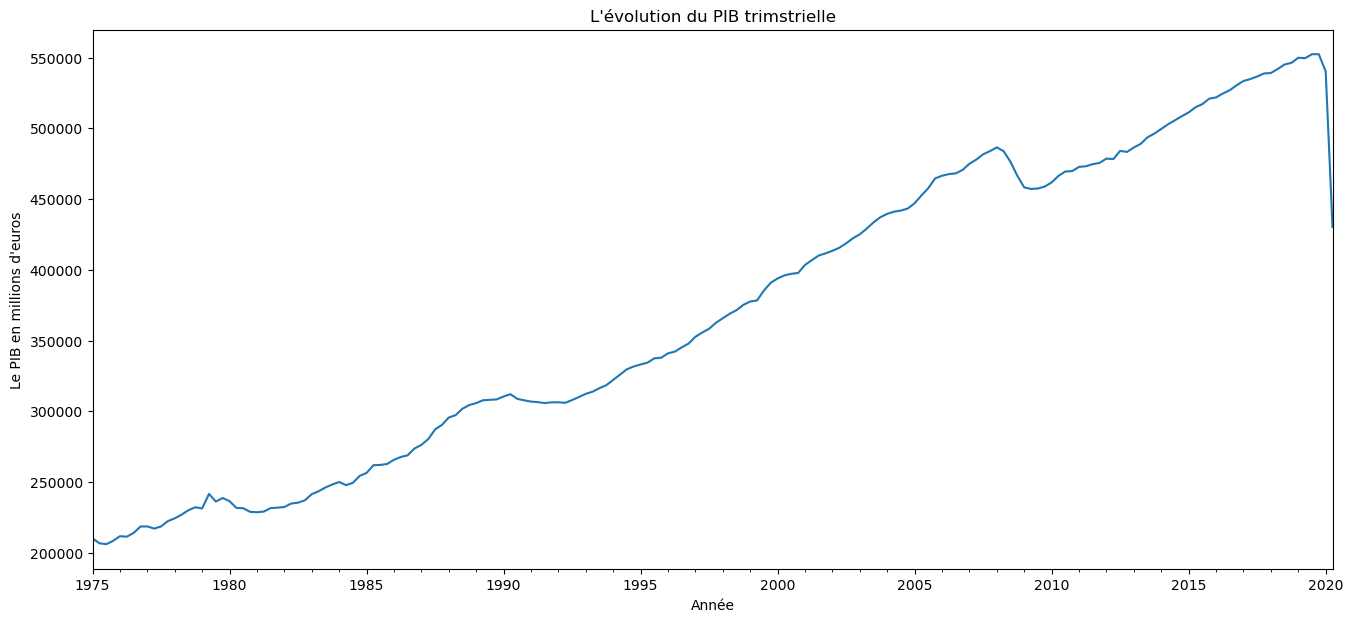

In [266]:
plt.rcParams["figure.figsize"] = [16,7]
GDP_UK_1.loc['1975': '2020', 'value'].plot()
plt.xlabel("Année")
plt.ylabel("Le PIB en millions d\'euros", y = 0.5)
plt.title("L\'évolution du PIB trimstrielle", y=1)
plt.draw()

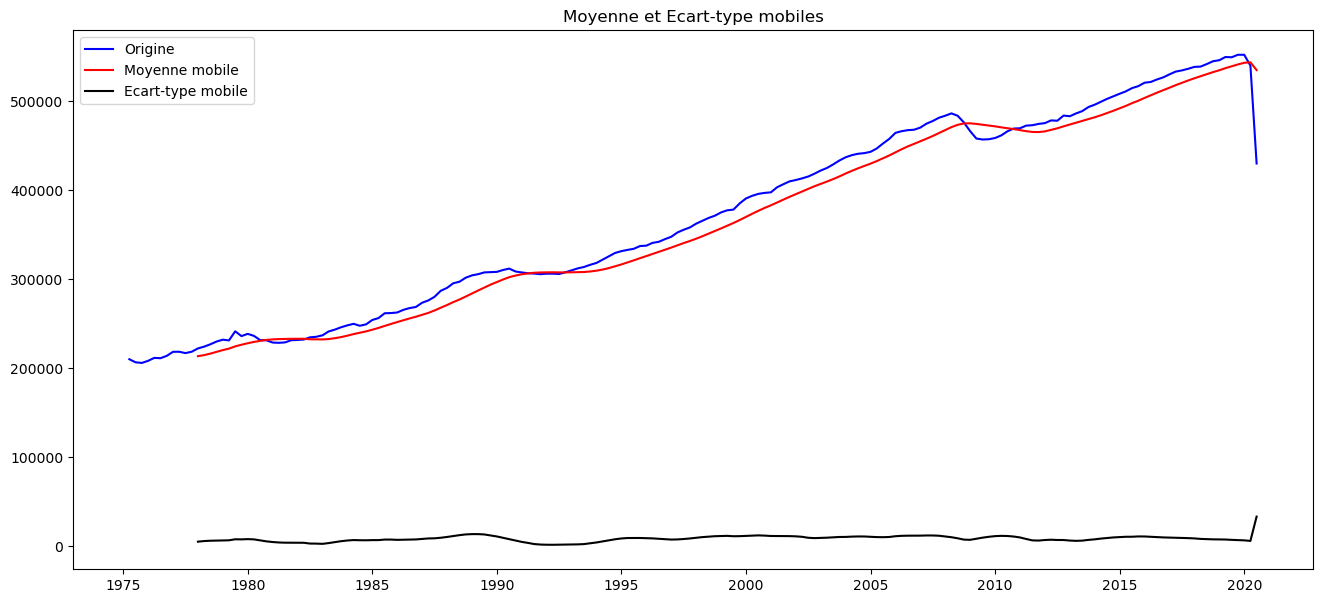

In [267]:
df = GDP_UK_1
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()
plt.plot(df, color = 'blue', label = 'Origine')
plt.plot(rolling_mean, color = 'red', label = 'Moyenne mobile')
plt.plot(rolling_std, color = 'black', label = 'Ecart-type mobile')
plt.legend(loc = 'best')
plt.title('Moyenne et Ecart-type mobiles')
plt.show()

### -- Question 3. Testez la stationnarité du PIB à l’aide d’un test de Dickey-Fuller. Que concluez-vous ?

In [268]:
X = GDP_UK_1.values
result = adfuller(X, autolag='AIC')

In [269]:
print(result)

(-1.6617245474210618, 0.4509331319100657, 3, 178, {'1%': -3.467631519151906, '5%': -2.8779183721695567, '10%': -2.575501353364474}, 3473.4141119463607)


In [270]:
result[1]
# Nous constatons que la pvalue du test de Dickey-Fuller est de 0.45, qui est supérieur à 5%. Par conséquent, la série du PIB n'est pas stationnaire.

0.4509331319100657

### -- Question 4. Transformez la variable pour obtenir une variable stationnaire. Vérifier la stationnarité de la variable transformée.

In [271]:
ts = df
data_diff = ts.diff(periods=1) 
data_diff.dropna(inplace=True)
result12 = adfuller(data_diff)
print(result12)

(0.8653766273964614, 0.9926214307975857, 2, 178, {'1%': -3.467631519151906, '5%': -2.8779183721695567, '10%': -2.575501353364474}, 3454.4656876048025)


In [272]:
#Nous constatons que la variable n'est pas stationnaire également. Evidemment, nous allons représenter notre variable à la question suivante.

### -- Question 5. Tracez l’évolution du PIB transformé dans le temps.

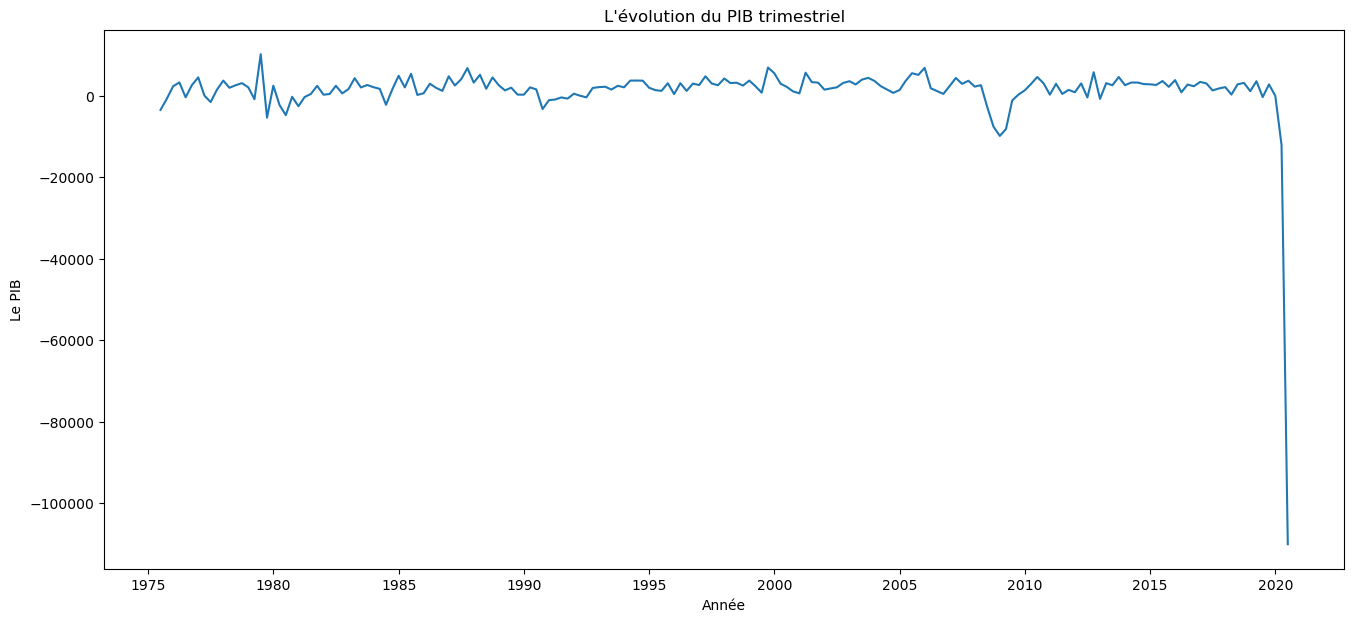

In [273]:
plt.plot(data_diff)
plt.xlabel("Année")
plt.ylabel("Le PIB", y = 0.5)
plt.title("L\'évolution du PIB trimestriel", y = 1)
plt.draw()
plt.draw()

### -- Question 6. Que constatez-vous à partir du premier trimestre 2020 ? Pourquoi ?

In [274]:
# A partir du premier trimestre de 2020, nous constatons une baisse significative du PIB. Cela est perçu par notre une courbe descendante de la 
#courbe en question.

### -- Question 7. Supprimez les observations de 2020 et sauvegardez la base. Supposons que l’on cherche à prévoir le taux de croissance à partir de 2016.

In [275]:
GDP_UK_NOT2020 = GDP_UK[GDP_UK["date"]<'2020-01-01']

In [276]:
GDP_UK_NOT2020_1 = GDP_UK_NOT2020.loc[:,['value','date']]
GDP_UK_NOT2020_1.head()

,value,date
0,210301.5,1975-03-31
1,206847.8,1975-06-30
2,206140.4,1975-09-30
3,208504.0,1975-12-31
4,211803.8,1976-03-31


### -- Question 8. Créez la variable représentant le taux de croissance du PIB par trimestre

In [277]:
GDP_UK_NOT2020_1['diff_1'] = GDP_UK_NOT2020_1['value'].diff()
GDP_UK_NOT2020_1.head()

,value,date,diff_1
0,210301.5,1975-03-31,NaN
1,206847.8,1975-06-30,-3453.7
2,206140.4,1975-09-30,-707.4
3,208504.0,1975-12-31,2363.6
4,211803.8,1976-03-31,3299.8


In [278]:
GDP_UK_NOT2020_12 = GDP_UK_NOT2020_1.dropna()

In [279]:
GDP_UK_NOT2020_12['Taux_Croissance_PIB'] = (GDP_UK_NOT2020_12['diff_1'] / GDP_UK_NOT2020_1['value'][0:179])*100

In [280]:
GDP_UK_NOT2020_12.head()

,value,date,diff_1,Taux_Croissance_PIB
1,206847.8,1975-06-30,-3453.7,-1.669682
2,206140.4,1975-09-30,-707.4,-0.343164
3,208504.0,1975-12-31,2363.6,1.133599
4,211803.8,1976-03-31,3299.8,1.557951
5,211453.8,1976-06-30,-350.0,-0.165521


In [281]:
                                                              ## La distribution du PIB ##

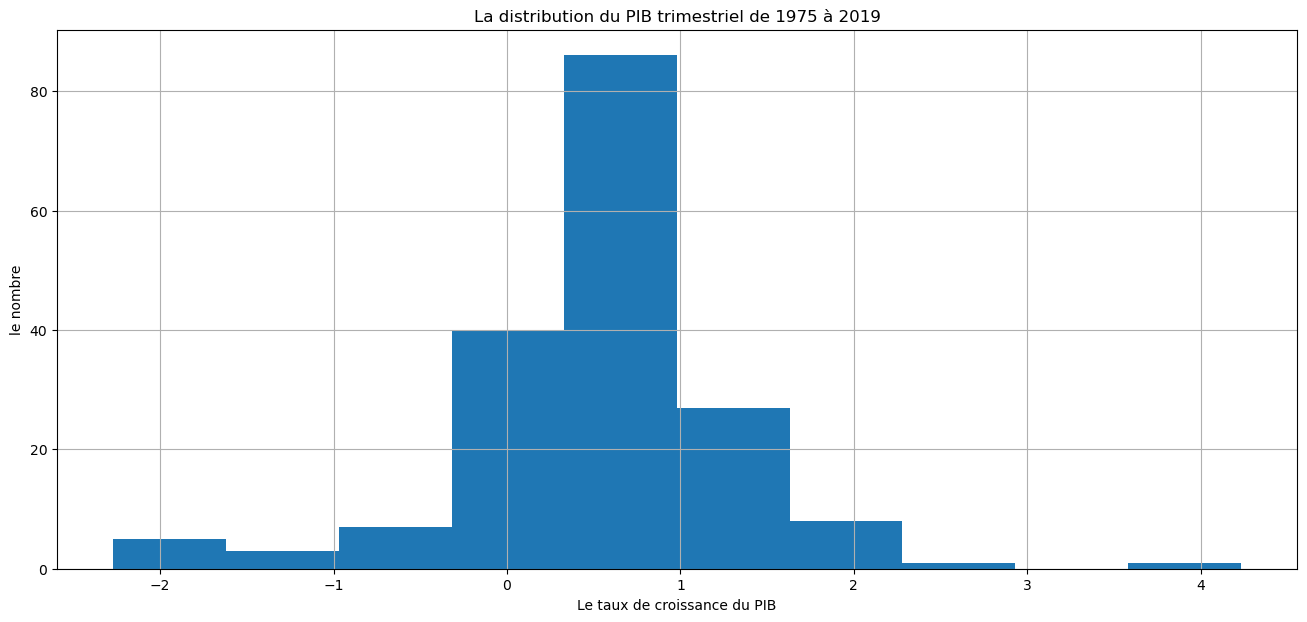

In [282]:
GDP_UK_NOT2020_12['Taux_Croissance_PIB'].hist()
plt.title('La distribution du PIB trimestriel de 1975 à 2019')
plt.ylabel('le nombre')
plt.xlabel('Le taux de croissance du PIB')
plt.draw()

In [283]:
                                                        ## L'évolution du PIB en fonction du temps ##

In [284]:
GDP_UK_NOT2020_122 = GDP_UK_NOT2020_12.loc[:,['date','Taux_Croissance_PIB']]
GDP_UK_NOT2020_122 = GDP_UK_NOT2020_122.set_index('date')

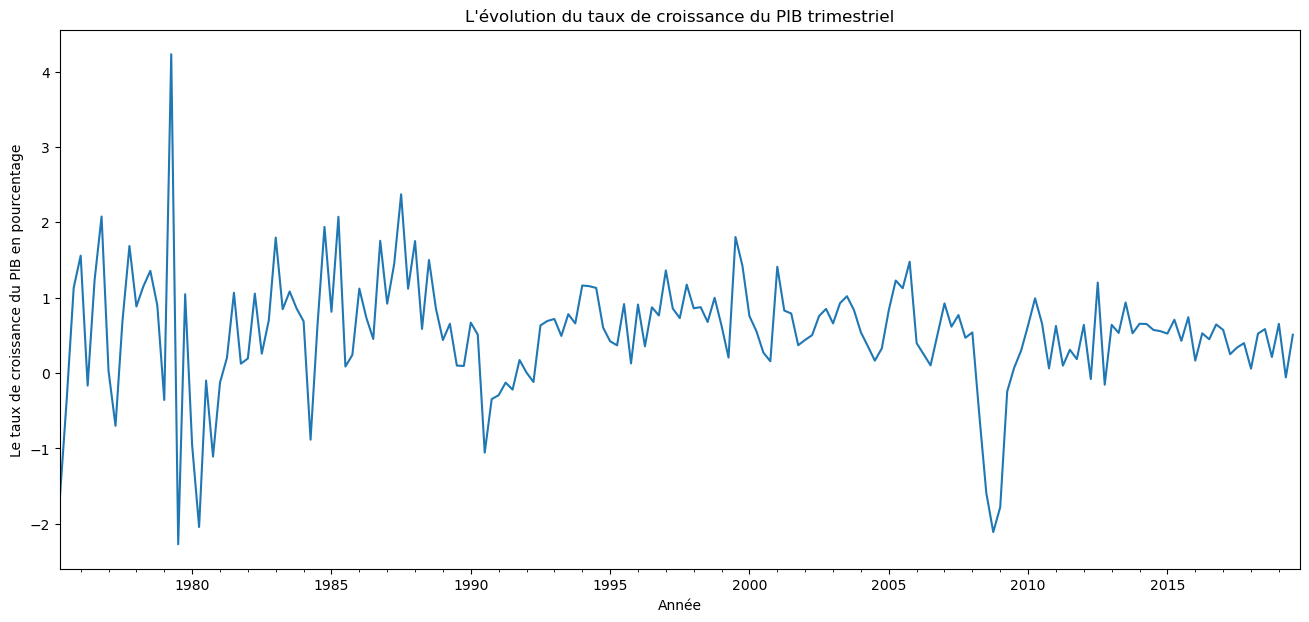

In [285]:
GDP_UK_NOT2020_122.loc['1975': '2019', 'Taux_Croissance_PIB'].plot()
plt.xlabel("Année")
plt.ylabel("Le taux de croissance du PIB en pourcentage", y = 0.5)
plt.title("L\'évolution du taux de croissance du PIB trimestriel", y = 1)
plt.draw()

In [286]:
GDP_UK_NOT2020_1221 = GDP_UK_NOT2020_12.loc[:,['date','Taux_Croissance_PIB']]

In [287]:
GDP_UK_NOT2020_12.head()

,value,date,diff_1,Taux_Croissance_PIB
1,206847.8,1975-06-30,-3453.7,-1.669682
2,206140.4,1975-09-30,-707.4,-0.343164
3,208504.0,1975-12-31,2363.6,1.133599
4,211803.8,1976-03-31,3299.8,1.557951
5,211453.8,1976-06-30,-350.0,-0.165521


In [288]:
GDP_UK_NOT2020_12211 = GDP_UK_NOT2020_1221.iloc[1:179,:]

In [289]:
adfuller(GDP_UK_NOT2020_12211['Taux_Croissance_PIB'])

(nan,
 nan,
 0,
 177,
 {'1%': -3.467845319799907,
  '5%': -2.878011745497439,
  '10%': -2.575551186759871},
 nan)

## -- STEP 2 : Estimation du modèle AR sur l’échantillon avant 2016.

### -- Question 9. Écrivez le modèle AR(1) sur la variable transformée

In [290]:
# Avant d'écrire un modèle AR(1), nous devons vérifier la stationarité de la série définissant le taux de croissance du PIB.
# Après la vérification de la stationarité par le test Dick fuller, et avec une p-value de 0.00087 inférieur à 0.05, on constate que la série est stationnaire.
# Par conséquent, je peux faire un AR(1) selon la formule suivante.
GDP_UK_NOT2020_12211_2016 = GDP_UK_NOT2020_12211[GDP_UK_NOT2020_12211['date']<'2016-01-01']
GDP_UK_NOT2020_12211_2016 = GDP_UK_NOT2020_12211_2016.set_index('date')

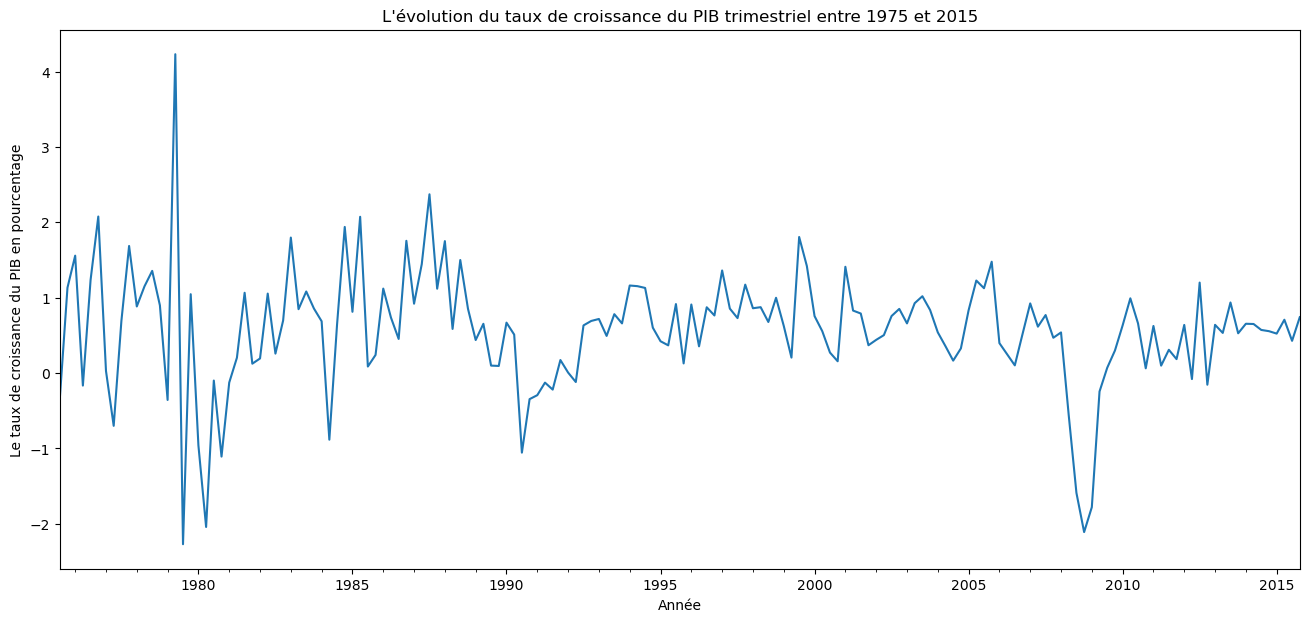

In [291]:
GDP_UK_NOT2020_12211_2016.loc['1975': '2015', 'Taux_Croissance_PIB'].plot()
plt.xlabel("Année")
plt.ylabel("Le taux de croissance du PIB en pourcentage", y = 0.5)
plt.title("L\'évolution du taux de croissance du PIB trimestriel entre 1975 et 2015", y = 1)
plt.draw()

In [292]:
                                                       ## Le test de stationarité ##
adfuller(GDP_UK_NOT2020_12211_2016['Taux_Croissance_PIB'])

(-3.9431337374480546,
 0.0017393691824602994,
 11,
 150,
 {'1%': -3.474714913481481,
  '5%': -2.881008708148148,
  '10%': -2.5771508444444446},
 304.4757826967825)

In [293]:
# Avant 2016, la série du taux de variation du PIB est stationnaire.

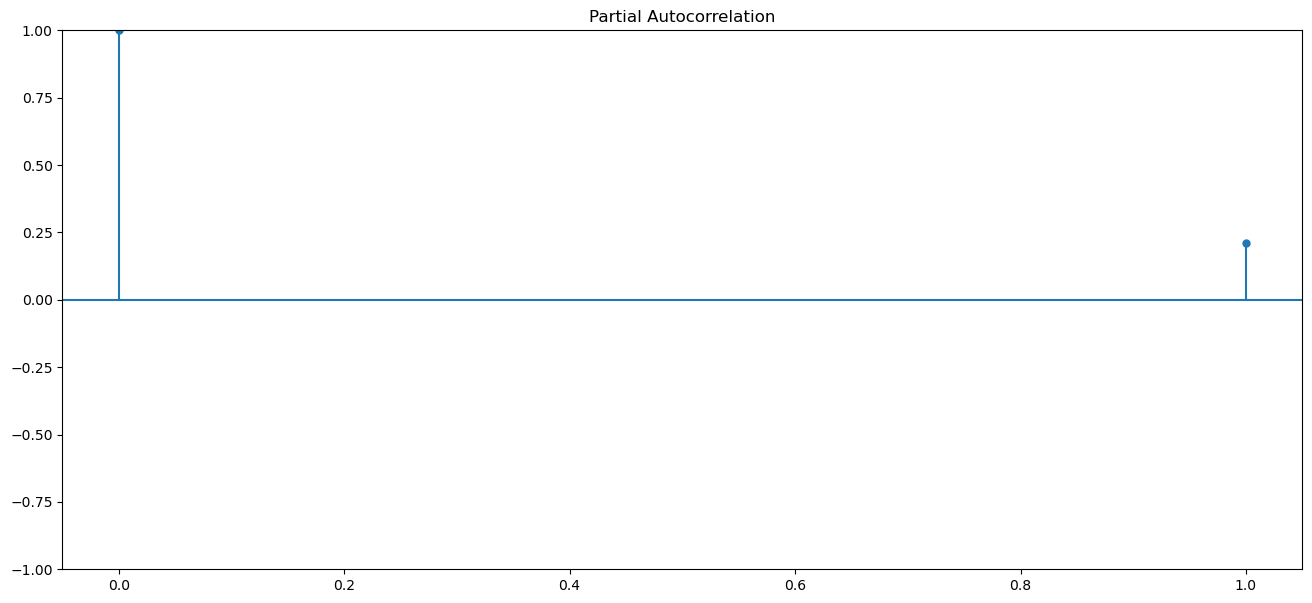

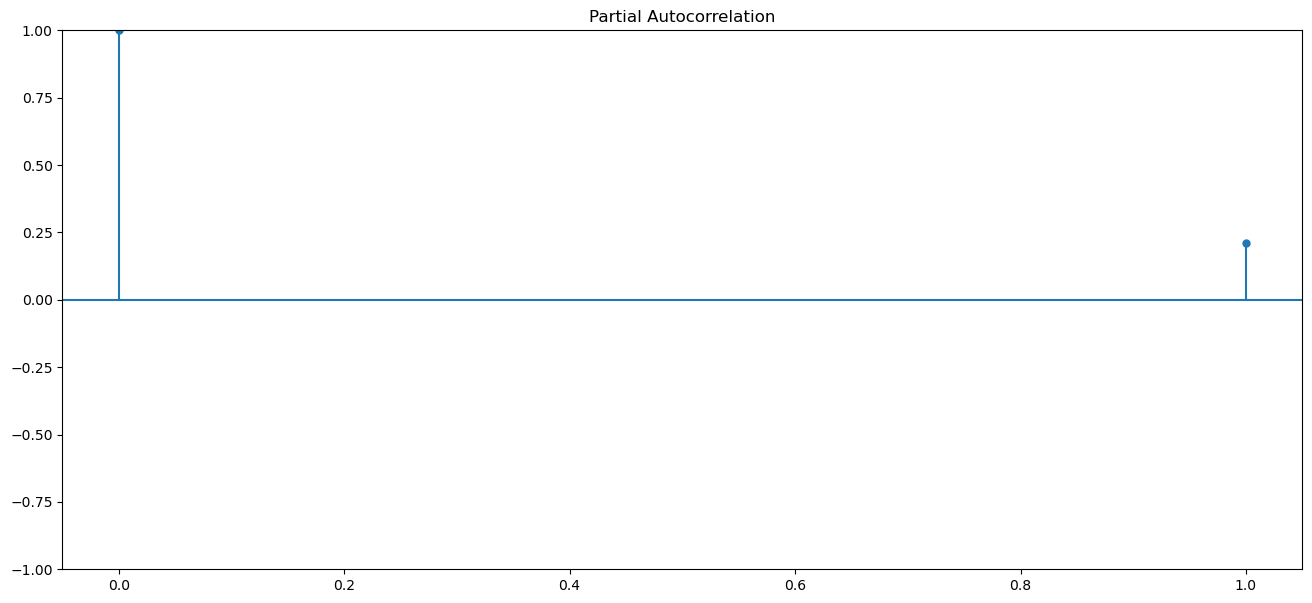

In [294]:
                                                        ## les fonctions d'auto-corrélation partielle ##
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
plot_pacf(GDP_UK_NOT2020_12211_2016['Taux_Croissance_PIB'], lags = 1)

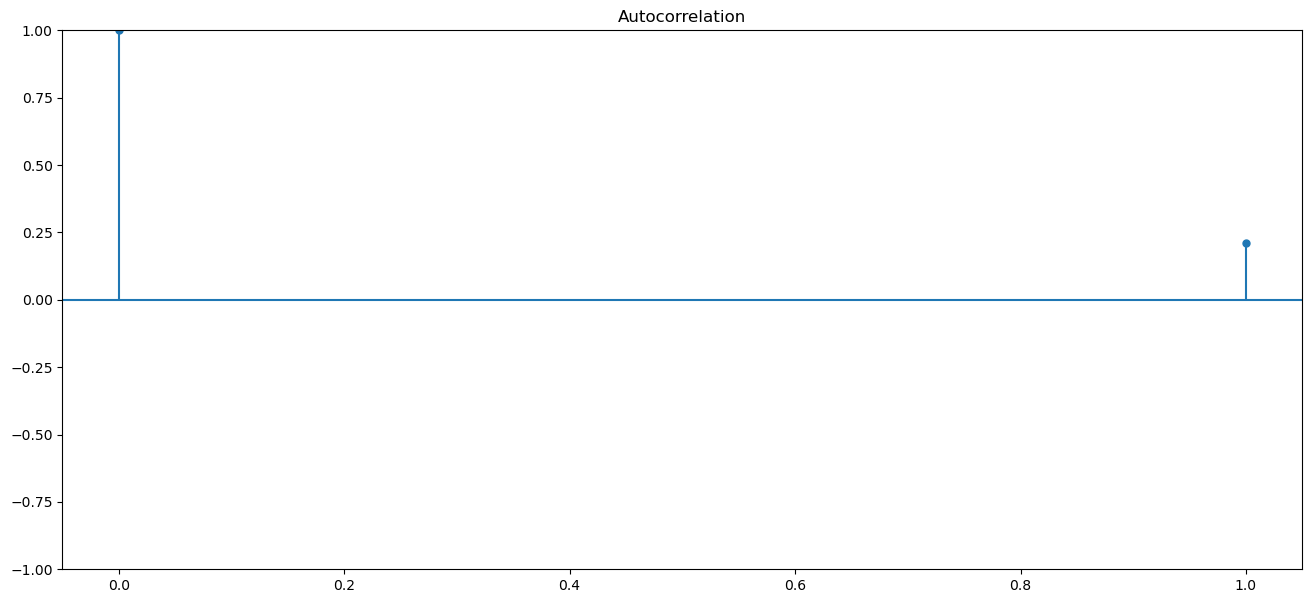

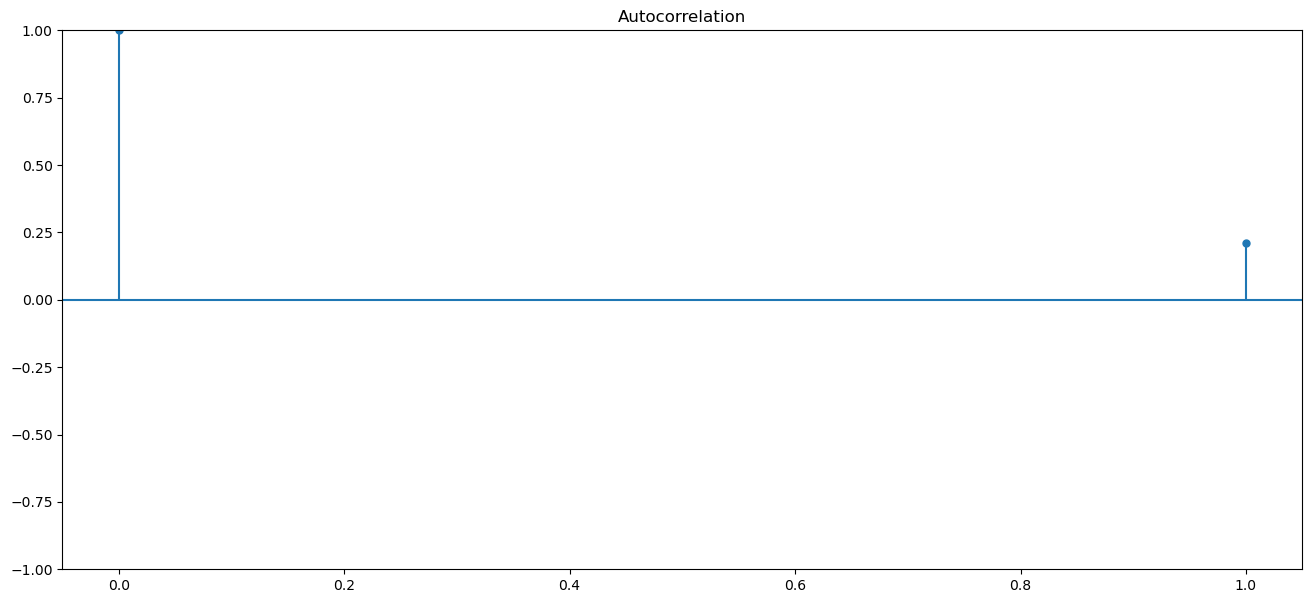

In [295]:
plot_acf(GDP_UK_NOT2020_12211_2016['Taux_Croissance_PIB'], lags = 1)

In [296]:
                                                        ## mon modèle AR(1) ##
from statsmodels.tsa. ar_model import AutoReg
ar_1_Model = AutoReg(GDP_UK_NOT2020_12211_2016['Taux_Croissance_PIB'], lags = 1).fit()

In [297]:
print(ar_1_Model.summary())

                             AutoReg Model Results                             
Dep. Variable:     Taux_Croissance_PIB   No. Observations:                  162
Model:                      AutoReg(1)   Log Likelihood                -187.356
Method:                Conditional MLE   S.D. of innovations              0.775
Date:                 Mon, 04 Sep 2023   AIC                            380.712
Time:                         13:57:57   BIC                            389.957
Sample:                     12-31-1975   HQIC                           384.466
                          - 12-31-2015                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.4526      0.075      6.046      0.000       0.306       0.599
Taux_Croissance_PIB.L1     0.2099      0.077      2.735      0.006       0.059       0.

### -- Question 10. Estimez le modèle AR(1) sur les données de 2005 à 2015.

In [298]:
GDP_UK_NOT2020_1221_2005_2015 = GDP_UK_NOT2020_12211[(GDP_UK_NOT2020_12211['date']>='2005-01-01') & (GDP_UK_NOT2020_12211['date'] <='2015-12-31')]
GDP_UK_NOT2020_1221_2005_2015 = GDP_UK_NOT2020_1221_2005_2015.set_index('date')

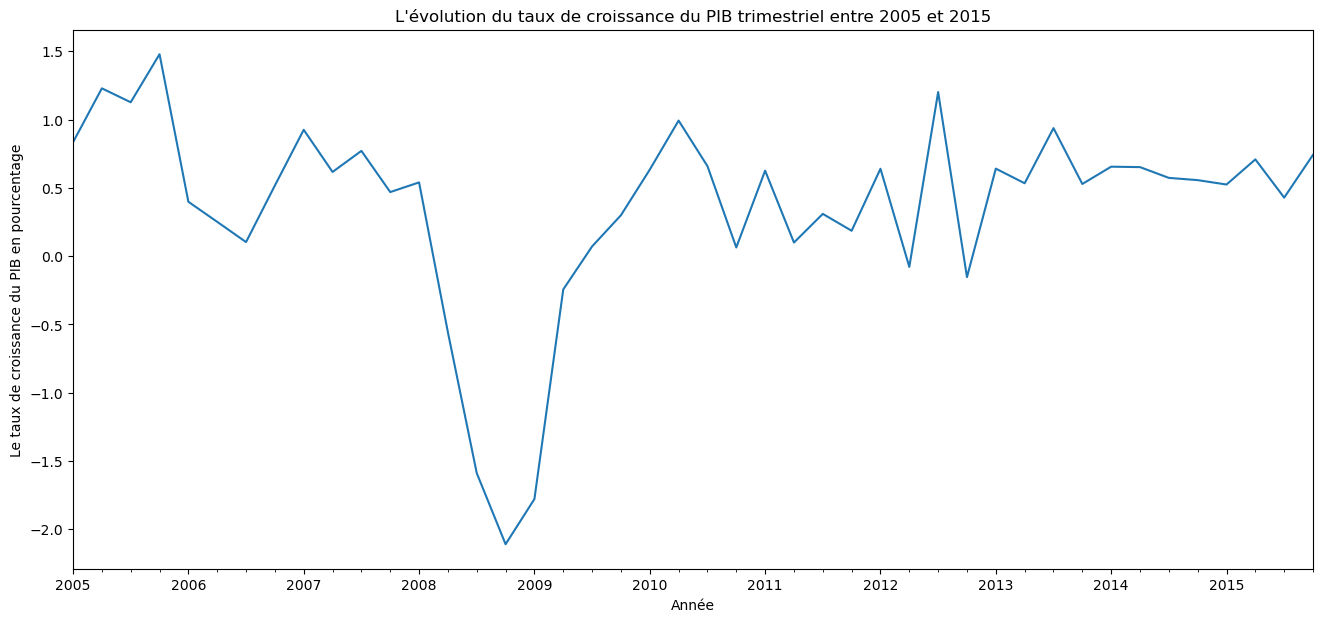

In [299]:
GDP_UK_NOT2020_1221_2005_2015.loc['2005': '2015', 'Taux_Croissance_PIB'].plot()
plt.xlabel("Année")
plt.ylabel("Le taux de croissance du PIB en pourcentage", y = 0.5)
plt.title("L\'évolution du taux de croissance du PIB trimestriel entre 2005 et 2015", y = 1)
plt.draw()

In [300]:
                                                        ## Le test de stationarité ##
adfuller(GDP_UK_NOT2020_1221_2005_2015['Taux_Croissance_PIB'])

(-3.540218752046808,
 0.00701230964122475,
 2,
 41,
 {'1%': -3.60098336718852,
  '5%': -2.9351348158036012,
  '10%': -2.6059629803688282},
 54.50147301802328)

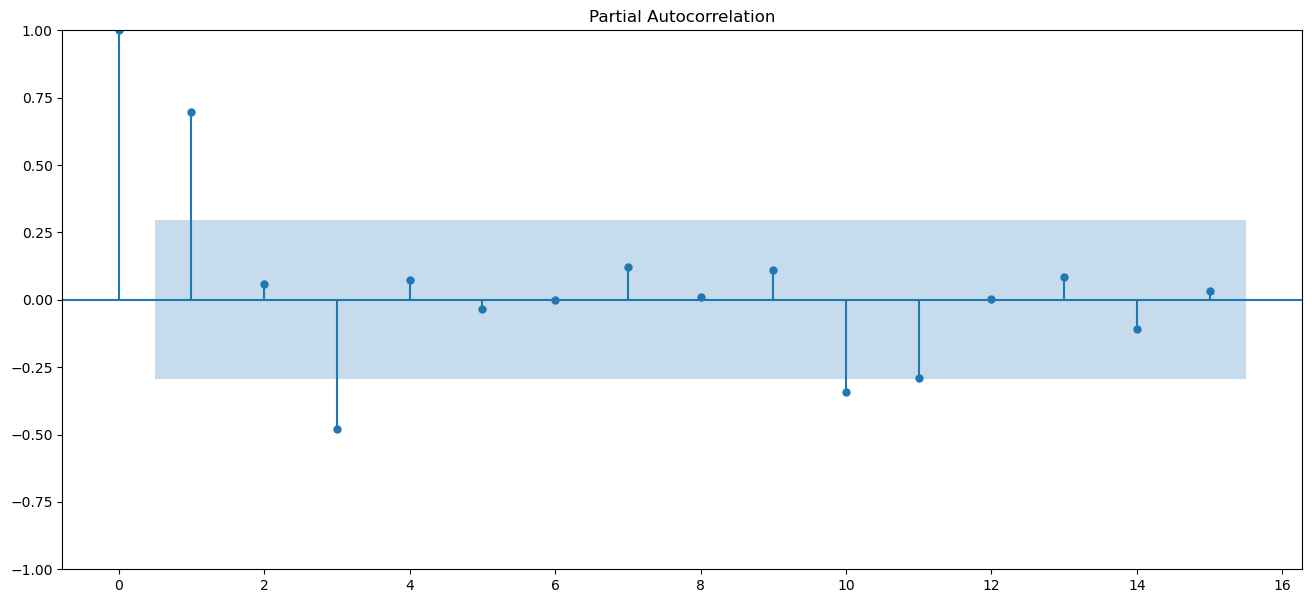

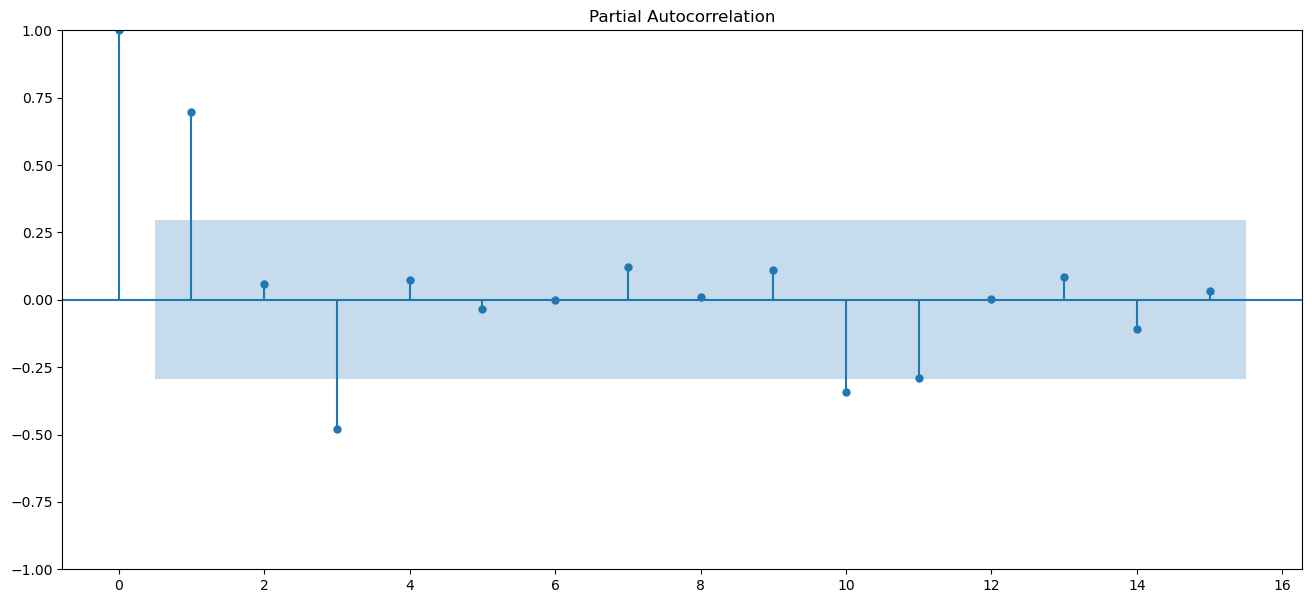

In [301]:
                                                        ## La fonction d'auto-corrélation ##
plot_pacf(GDP_UK_NOT2020_1221_2005_2015['Taux_Croissance_PIB'], lags = 15)

In [302]:
                                                    # Le modèle AR(1) entre 2005 et 2015 #
    
ar_1_Model_2015 = AutoReg(GDP_UK_NOT2020_1221_2005_2015['Taux_Croissance_PIB'], lags = 1).fit()

In [303]:
print(ar_1_Model_2015.summary())

                             AutoReg Model Results                             
Dep. Variable:     Taux_Croissance_PIB   No. Observations:                   44
Model:                      AutoReg(1)   Log Likelihood                 -33.114
Method:                Conditional MLE   S.D. of innovations              0.523
Date:                 Mon, 04 Sep 2023   AIC                             72.228
Time:                         13:57:59   BIC                             77.511
Sample:                     06-30-2005   HQIC                            74.176
                          - 12-31-2015                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1100      0.089      1.238      0.216      -0.064       0.284
Taux_Croissance_PIB.L1     0.6839      0.111      6.168      0.000       0.467       0.

## -- STEP 3 : Estimation hors échantillon (à partir de 2016)

In [304]:
from statsmodels.tsa.ar_model import AR, ARResults

In [305]:
GDP_UK_NOT2020_1221_2005_2015

,Taux_Croissance_PIB
date,
2005-03-31,0.833415
2005-06-30,1.227999
2005-09-30,1.126196
2005-12-31,1.477833
2006-03-31,0.397771
2006-06-30,0.250894
2006-09-30,0.102707
2006-12-31,0.516851
2007-03-31,0.924702


In [306]:
vb = AutoReg(GDP_UK_NOT2020_1221_2005_2015['Taux_Croissance_PIB'], lags = 1).fit()
#.fit(maxlag=1)

In [307]:

print(vb.summary())

                             AutoReg Model Results                             
Dep. Variable:     Taux_Croissance_PIB   No. Observations:                   44
Model:                      AutoReg(1)   Log Likelihood                 -33.114
Method:                Conditional MLE   S.D. of innovations              0.523
Date:                 Mon, 04 Sep 2023   AIC                             72.228
Time:                         13:58:01   BIC                             77.511
Sample:                     06-30-2005   HQIC                            74.176
                          - 12-31-2015                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1100      0.089      1.238      0.216      -0.064       0.284
Taux_Croissance_PIB.L1     0.6839      0.111      6.168      0.000       0.467       0.

In [308]:
test = GDP_UK_NOT2020_12211[GDP_UK_NOT2020_12211['date'] >= '2016-01-01']
test = test.set_index('date')

In [309]:
test.head()

,Taux_Croissance_PIB
date,
2016-03-31,0.166075
2016-06-30,0.527945
2016-09-30,0.448737
2016-12-31,0.645437
2017-03-31,0.573125


In [310]:
GDP_UK_NOT2020_1221_2005_2015.head()

,Taux_Croissance_PIB
date,
2005-03-31,0.833415
2005-06-30,1.227999
2005-09-30,1.126196
2005-12-31,1.477833
2006-03-31,0.397771


In [311]:
end = len(test) + len(GDP_UK_NOT2020_1221_2005_2015['Taux_Croissance_PIB'])-1

In [312]:
start = len(GDP_UK_NOT2020_1221_2005_2015['Taux_Croissance_PIB'])

In [313]:
predictions_1 = vb.predict(start = start, end = end)

In [314]:
predictions_1 = predictions_1.rename('AR(1) predictions')

In [315]:
predictions_1

2016-03-31    0.617378
2016-06-30    0.532229
2016-09-30    0.473996
2016-12-31    0.434171
2017-03-31    0.406935
2017-06-30    0.388308
2017-09-30    0.375569
2017-12-31    0.366857
2018-03-31    0.360898
2018-06-30    0.356824
2018-09-30    0.354037
2018-12-31    0.352131
2019-03-31    0.350828
2019-06-30    0.349936
2019-09-30    0.349327
2019-12-31    0.348910
Freq: Q-DEC, Name: AR(1) predictions, dtype: float64

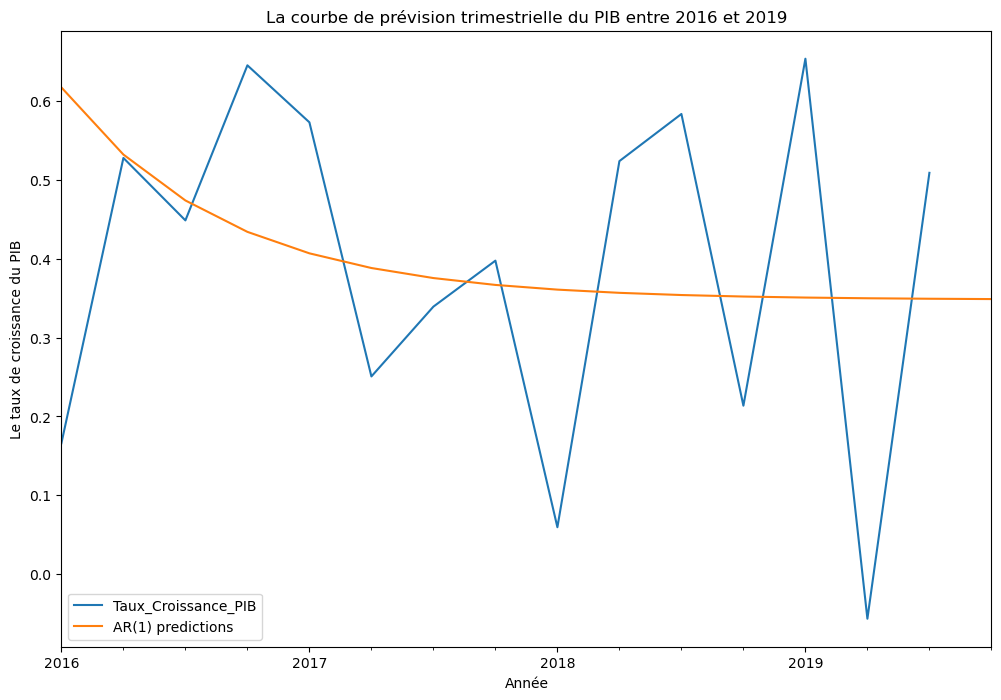

In [316]:
test.plot(figsize = (12,8), legend = True)
predictions_1.plot(legend = True)
plt.xlabel("Année")
plt.ylabel("Le taux de croissance du PIB", y = 0.5)
plt.title("La courbe de prévision trimestrielle du PIB entre 2016 et 2019", y = 1)
plt.draw()

### -- Question 11. Utilisez le modèle estimé en question 10 pour prévoir le taux de croissance du PIB à partir de 2016.

### -- Question 12. Calculez l’erreur de prévision quadratique moyenne (MSFE) (i.e. sur les données hors échantillon).

In [317]:
from sklearn.metrics import mean_squared_error

In [318]:
mean_squared_error(test.fillna(0), predictions_1)

0.05580057944225787

## -- STEP 4 Description de l’évolution de l’indicateur de confiance de l’industrie

## -- LA DEUXIEME BASE DE DONNEES

### -- Question 13. La base de données "BCS_UK.xlsx" contient la série mensuelle de l’indicateur synthétique de confiance de l’industrie de 1993 à 2020 (voir le dictionnaire des variables en annexe). Ouvrez la base.

In [319]:
BCS_UK = pd.read_excel('BCS_UK.xls', parse_dates = True, date_parser = 'time')
BCS_UK.head()

,time,INDUUKTOTCOFBSM
0,1985-01-31,-2.1
1,1985-02-28,-1.4
2,1985-03-31,-2.6
3,1985-04-30,1.9
4,1985-05-31,-0.7


In [320]:
BCS_UK.tail()

,time,INDUUKTOTCOFBSM
424,2020-05-31,-42.4
425,2020-06-30,-38.9
426,2020-07-31,-22.1
427,2020-08-31,-30.7
428,2020-09-30,-21.5


### -- Question 14. Trimestrialisez les données.

In [321]:
BCS_UK.loc[:,'annee']=pd.to_datetime(BCS_UK['time']).dt.year
BCS_UK.loc[:,'trimestre']=pd.to_datetime(BCS_UK['time']).dt.quarter

In [322]:
BCS_UK.head()

,time,INDUUKTOTCOFBSM,annee,trimestre
0,1985-01-31,-2.1,1985,1
1,1985-02-28,-1.4,1985,1
2,1985-03-31,-2.6,1985,1
3,1985-04-30,1.9,1985,2
4,1985-05-31,-0.7,1985,2


In [323]:
BCS_UK.tail()

,time,INDUUKTOTCOFBSM,annee,trimestre
424,2020-05-31,-42.4,2020,2
425,2020-06-30,-38.9,2020,2
426,2020-07-31,-22.1,2020,3
427,2020-08-31,-30.7,2020,3
428,2020-09-30,-21.5,2020,3


In [324]:
BCS_UK = BCS_UK.groupby(by=["annee",'trimestre'], dropna=False).mean()['INDUUKTOTCOFBSM'].reset_index().round(0)

In [325]:
BCS_UK.head()

,annee,trimestre,INDUUKTOTCOFBSM
0,1985,1,-2.0
1,1985,2,1.0
2,1985,3,-1.0
3,1985,4,-0.0
4,1986,1,-5.0


In [326]:
BCS_UK.tail()

,annee,trimestre,INDUUKTOTCOFBSM
138,2019,3,-18.0
139,2019,4,-19.0
140,2020,1,-18.0
141,2020,2,-42.0
142,2020,3,-25.0


In [327]:
BCS_UK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   annee            143 non-null    int32  
 1   trimestre        143 non-null    int32  
 2   INDUUKTOTCOFBSM  143 non-null    float64
dtypes: float64(1), int32(2)
memory usage: 2.4 KB


In [328]:
dates_true1 = []
dates_true11 = []
trimestre = list(BCS_UK["trimestre"].unique())

for i in list(BCS_UK["trimestre"]):
    
    if i == trimestre[0]:
        
        dates_true1.append("31")
        dates_true11.append("03")
        
    if i == trimestre[1]:
        
        dates_true1.append("30")
        dates_true11.append("06")
        
    if i == trimestre[2]:
        
        
        dates_true1.append("30")
        dates_true11.append("09")
        
    if i == trimestre[3]:
        
        dates_true1.append("31")
        dates_true11.append("12")

In [329]:
BCS_UK["day"] = dates_true1
BCS_UK["month"] = dates_true11
BCS_UK['date'] = BCS_UK["annee"].astype(str)  + BCS_UK["month"].astype(str) + BCS_UK["day"].astype(str)
BCS_UK['date'] = pd.to_datetime(BCS_UK['date'])
BCS_UK.head(n=4)

,annee,trimestre,INDUUKTOTCOFBSM,day,month,date
0,1985,1,-2.0,31,03,1985-03-31
1,1985,2,1.0,30,06,1985-06-30
2,1985,3,-1.0,30,09,1985-09-30
3,1985,4,-0.0,31,12,1985-12-31


### -- Question 15. Tracez l’évolution de l’indicateur dans le temps.

In [330]:
BCS_UK_P = BCS_UK.loc[:,["date","INDUUKTOTCOFBSM"]]
BCS_UK_P = BCS_UK_P.set_index('date')

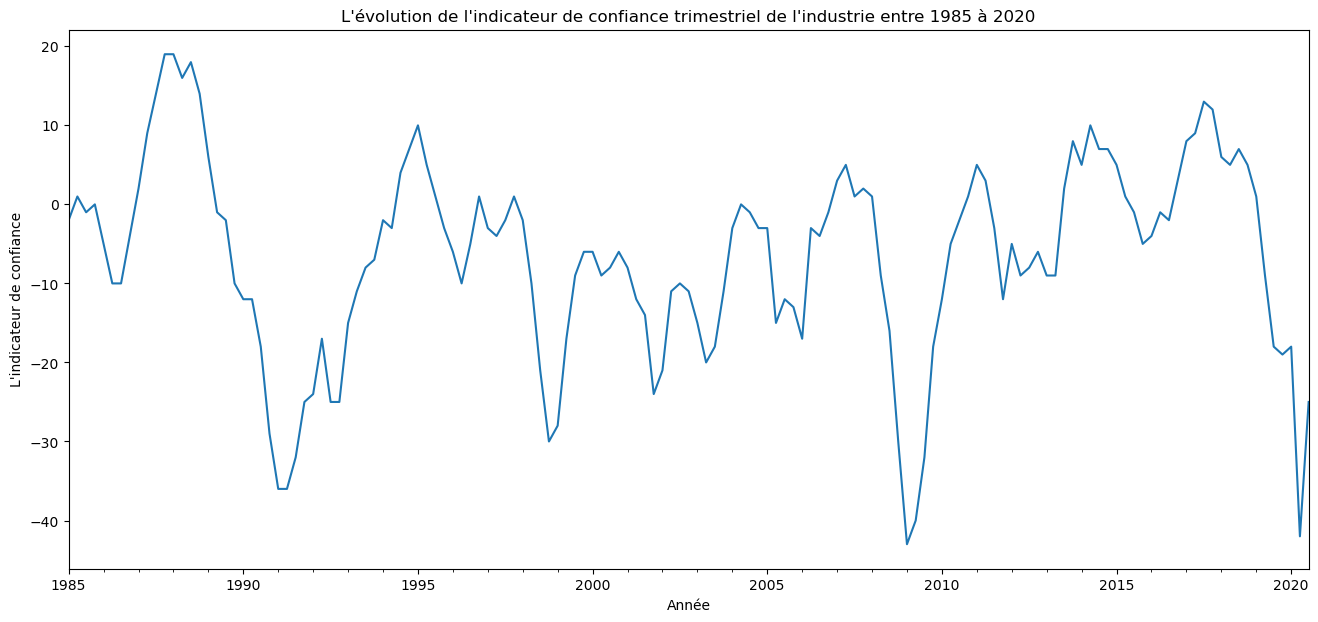

In [331]:
plt.rcParams["figure.figsize"] = [16,7]
BCS_UK_P.loc['1985': '2020', 'INDUUKTOTCOFBSM'].plot()
plt.xlabel("Année") 
plt.ylabel("L\'indicateur de confiance", y = 0.5)
plt.title("L\'évolution de l\'indicateur de confiance trimestriel de l\'industrie entre 1985 à 2020", y = 1)
plt.draw()

### -- Question 16. Vérifiez la stationnarité de l’indicateur.

In [332]:
X = BCS_UK_P.values
result = adfuller(X, autolag='AIC')
result

(-3.877505790886277,
 0.002206772284146727,
 11,
 131,
 {'1%': -3.481281802271349,
  '5%': -2.883867891664528,
  '10%': -2.5786771965503177},
 806.5178102289644)

### -- Question 17. Fusionnez l’indicateur avec la série du PIB sauvegardée.

In [333]:
GDP_UK_1 = GDP_UK_1.reset_index()  # LE PIB
BCS_UK_P = BCS_UK_P.reset_index()  # L'indicateur

In [334]:
#GDP_UK_NOT2020_12
#GDP_UK_1
BCS_GDP_UK = pd.merge(GDP_UK_NOT2020_12, BCS_UK_P, on = 'date', how = 'inner')

In [335]:
BCS_UK_P.head()

,date,INDUUKTOTCOFBSM
0,1985-03-31,-2.0
1,1985-06-30,1.0
2,1985-09-30,-1.0
3,1985-12-31,-0.0
4,1986-03-31,-5.0


In [336]:
BCS_GDP_UK.head()

,value,date,diff_1,Taux_Croissance_PIB,INDUUKTOTCOFBSM
0,256515.1,1985-03-31,2086.4,0.813363,-2.0
1,261947.5,1985-06-30,5432.4,2.073851,1.0
2,262176.3,1985-09-30,228.8,0.087270,-1.0
3,262809.9,1985-12-31,633.6,0.241087,-0.0
4,265790.2,1986-03-31,2980.3,1.121298,-5.0


In [337]:
BCS_GDP_UK = BCS_GDP_UK.loc[:,['date','INDUUKTOTCOFBSM','Taux_Croissance_PIB','diff_1']]

In [338]:
BCS_GDP_UK

,date,INDUUKTOTCOFBSM,Taux_Croissance_PIB,diff_1
0,1985-03-31,-2.0,0.813363,2086.4
1,1985-06-30,1.0,2.073851,5432.4
2,1985-09-30,-1.0,0.087270,228.8
3,1985-12-31,-0.0,0.241087,633.6
4,1986-03-31,-5.0,1.121298,2980.3
...,...,...,...,...
135,2018-12-31,5.0,0.213643,1167.0
136,2019-03-31,1.0,0.653816,3594.9
137,2019-06-30,-9.0,-0.056595,-311.0
138,2019-09-30,-18.0,0.509058,2811.7


## -- STEP 5: Estimation du modèle avec l’indicateur synthétique du climat des affaires

### -- Considérons le modèle dans lequel la variable de croissance dépend de l’indicateur en niveau et de l’indicateur en différence première.

In [339]:
BCS_UK_P['indicateur_pre_diff'] = BCS_UK_P['INDUUKTOTCOFBSM'].diff()

In [340]:
BCS_UK_P.head()

,date,INDUUKTOTCOFBSM,indicateur_pre_diff
0,1985-03-31,-2.0,NaN
1,1985-06-30,1.0,3.0
2,1985-09-30,-1.0,-2.0
3,1985-12-31,-0.0,1.0
4,1986-03-31,-5.0,-5.0


In [341]:
BCS_UK_P1 = BCS_UK_P.loc[:,['date','indicateur_pre_diff','INDUUKTOTCOFBSM']]

In [342]:
BCS_UK_P12 = BCS_UK_P1

In [343]:
BCS_UK_P12.dropna(inplace = True)

In [344]:
BCS_UK_P12["taux_indice"] = BCS_UK_P12['indicateur_pre_diff'] / BCS_UK_P1["INDUUKTOTCOFBSM"][0:142]

In [345]:
BCS_UK_P121 = BCS_UK_P12

In [346]:
#BCS_UK_P121[~BCS_UK_P121.isin([np.nan, np.inf, -np.inf]).any(1)]

In [347]:
BCS_GDP_UK_REG1 = BCS_UK_P121

### -- Question 18. Estimez le modèle sur les données de 2005 à 2015.

In [348]:
BCS_GDP_UK_REG11 = BCS_GDP_UK_REG1[(BCS_GDP_UK_REG1['date'] >= '2005-01-01') & (BCS_GDP_UK_REG1['date'] <= '2019-12-31')]

In [349]:
BCS_GDP_UK_REG11.head()

,date,indicateur_pre_diff,INDUUKTOTCOFBSM,taux_indice
80,2005-03-31,0.0,-3.0,-0.000000
81,2005-06-30,-12.0,-15.0,0.800000
82,2005-09-30,3.0,-12.0,-0.250000
83,2005-12-31,-1.0,-13.0,0.076923
84,2006-03-31,-4.0,-17.0,0.235294


In [350]:
BCS_GDP_UK_REG111 = BCS_GDP_UK_REG11.loc[:,['date', 'indicateur_pre_diff','INDUUKTOTCOFBSM']]

In [351]:
BCS_GDP_UK_REG111.head()

,date,indicateur_pre_diff,INDUUKTOTCOFBSM
80,2005-03-31,0.0,-3.0
81,2005-06-30,-12.0,-15.0
82,2005-09-30,3.0,-12.0
83,2005-12-31,-1.0,-13.0
84,2006-03-31,-4.0,-17.0


In [352]:
BCS_GDP_UK
BCS_GDP_UK123 = BCS_GDP_UK[(BCS_GDP_UK['date'] >= '2005-01-01') & (BCS_GDP_UK['date'] <= '2019-12-31')]

In [353]:
BCS_GDP_UK123.head()

,date,INDUUKTOTCOFBSM,Taux_Croissance_PIB,diff_1
80,2005-03-31,-3.0,0.833415,3725.7
81,2005-06-30,-15.0,1.227999,5557.9
82,2005-09-30,-12.0,1.126196,5155.2
83,2005-12-31,-13.0,1.477833,6866.3
84,2006-03-31,-17.0,0.397771,1855.5


In [354]:
data_reg = pd.merge(BCS_GDP_UK123.loc[:,['date','Taux_Croissance_PIB','diff_1']], BCS_GDP_UK_REG111, on = 'date', how = 'inner')

In [355]:
data_reg_train = data_reg[(data_reg['date'] >= '2005-01-01') & (data_reg['date'] <= '2015-12-31')]
data_reg_testn = data_reg[(data_reg['date'] > '2015-12-31') & (data_reg['date'] <= '2019-12-31')]

In [356]:
data_reg_testn['Taux_Croissance_PIB']

44    0.166075
45    0.527945
46    0.448737
47    0.645437
48    0.573125
49    0.250763
50    0.339311
51    0.397639
52    0.059456
53    0.523926
54    0.583721
55    0.213643
56    0.653816
57   -0.056595
58    0.509058
59         NaN
Name: Taux_Croissance_PIB, dtype: float64

In [357]:
data_reg_train

,date,Taux_Croissance_PIB,diff_1,indicateur_pre_diff,INDUUKTOTCOFBSM
0,2005-03-31,0.833415,3725.7,0.0,-3.0
1,2005-06-30,1.227999,5557.9,-12.0,-15.0
2,2005-09-30,1.126196,5155.2,3.0,-12.0
3,2005-12-31,1.477833,6866.3,-1.0,-13.0
4,2006-03-31,0.397771,1855.5,-4.0,-17.0
5,2006-06-30,0.250894,1173.3,14.0,-3.0
6,2006-09-30,0.102707,480.8,-1.0,-4.0
7,2006-12-31,0.516851,2432.1,3.0,-1.0
8,2007-03-31,0.924702,4391.9,4.0,3.0
9,2007-06-30,0.616136,2944.5,2.0,5.0


### -- MODELE 1: La croissance en fonction l'indicateur et la différence première

In [358]:
from sklearn.linear_model import LinearRegression

In [359]:
import statsmodels.api as sm
from sklearn import linear_model

In [360]:
#créer un objet reg linéaire
y=data_reg_train['Taux_Croissance_PIB']
X=data_reg_train.loc[:,['indicateur_pre_diff','INDUUKTOTCOFBSM']]
X = sm.add_constant(X) # une autre façons d'ajouter une constante
model = sm.OLS(y, X)

In [361]:
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     Taux_Croissance_PIB   R-squared:                       0.397
Model:                             OLS   Adj. R-squared:                  0.367
Method:                  Least Squares   F-statistic:                     13.49
Date:                 Mon, 04 Sep 2023   Prob (F-statistic):           3.15e-05
Time:                         13:58:24   Log-Likelihood:                -36.419
No. Observations:                   44   AIC:                             78.84
Df Residuals:                       41   BIC:                             84.19
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   

In [362]:
                                                                   ## Les prédictions ##

X_test = data_reg_testn.loc[:,['indicateur_pre_diff','INDUUKTOTCOFBSM']]
X_test = sm.add_constant(X_test)
ypred = results.predict(X_test)
ypred

44    0.464347
45    0.619601
46    0.448557
47    0.802747
48    0.942210
49    0.826952
50    1.045885
51    0.839054
52    0.492760
53    0.643806
54    0.806954
55    0.608018
56    0.424872
57   -0.068781
58   -0.284027
59   -0.025618
dtype: float64

In [363]:
data_1 = pd.DataFrame()
data_1['date'] = data_reg_testn['date']
data_1['tauxDecroissance'] = data_reg_testn['Taux_Croissance_PIB']
data_1['prevision'] = ypred
data_1 = data_1.set_index('date')

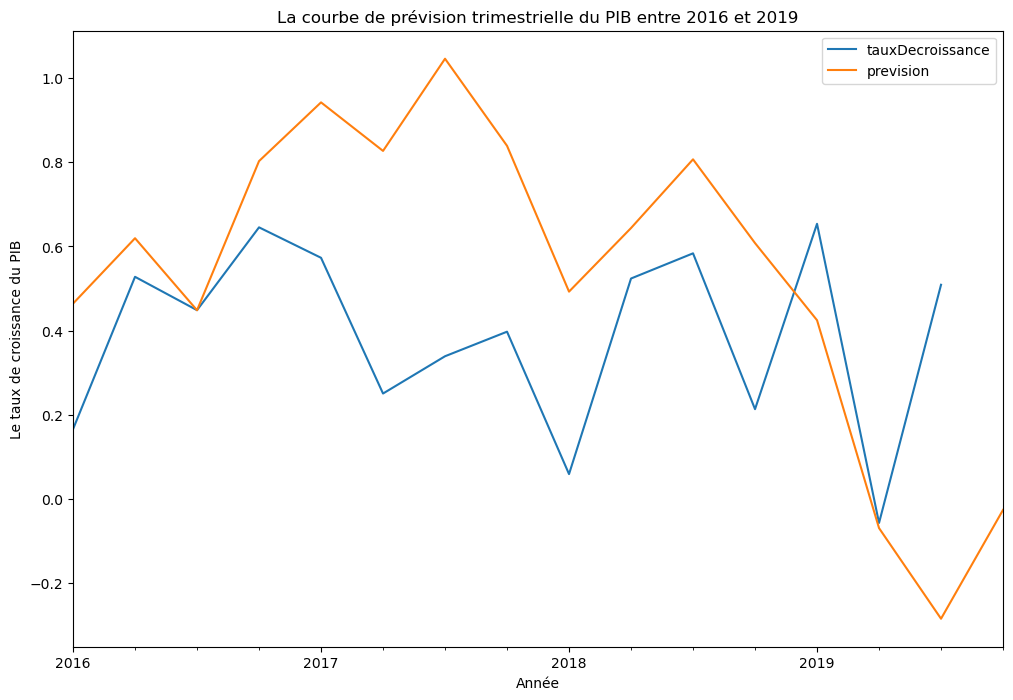

In [364]:
data_1['tauxDecroissance'].plot(figsize = (12,8), legend = True)
data_1['prevision'].plot(legend = True)
plt.xlabel("Année")
plt.ylabel("Le taux de croissance du PIB", y = 0.5)
plt.title("La courbe de prévision trimestrielle du PIB entre 2016 et 2019", y = 1)
plt.draw()

In [365]:
mean_squared_error(data_reg_testn['Taux_Croissance_PIB'].fillna(0), ypred)

0.14838232329630677

### -- MODELE 2: La croissance en fonction l'indicateur et la différence première

In [366]:
#créer un objet reg linéaire
y1=data_reg_train['Taux_Croissance_PIB']
X1=data_reg_train.loc[:,['diff_1','indicateur_pre_diff','INDUUKTOTCOFBSM']]
X1 = sm.add_constant(X1) # une autre façons d'ajouter une constante
model1 = sm.OLS(y1, X1)
results1 = model1.fit()

In [367]:
print(results1.summary())

                             OLS Regression Results                            
Dep. Variable:     Taux_Croissance_PIB   R-squared:                       0.999
Model:                             OLS   Adj. R-squared:                  0.999
Method:                  Least Squares   F-statistic:                 1.048e+04
Date:                 Mon, 04 Sep 2023   Prob (F-statistic):           6.17e-58
Time:                         13:58:27   Log-Likelihood:                 99.159
No. Observations:                   44   AIC:                            -190.3
Df Residuals:                       40   BIC:                            -183.2
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -

In [368]:
                                                                   ## Les prédictions ##

X_test1 = data_reg_testn.loc[:,['diff_1','indicateur_pre_diff','INDUUKTOTCOFBSM']]
X_test1 = sm.add_constant(X_test1)
ypred1 = results1.predict(X_test1)

In [369]:
ypred1

44    0.170454
45    0.575253
46    0.488030
47    0.712501
48    0.630442
49    0.261627
50    0.362100
51    0.429619
52    0.043350
53    0.583903
54    0.656658
55    0.226437
56    0.747275
57   -0.081348
58    0.592917
59   -0.003917
dtype: float64

In [370]:
data_11 = pd.DataFrame()
data_11['date'] = data_reg_testn['date']
data_11['tauxDecroissance'] = data_reg_testn['Taux_Croissance_PIB']
data_11['prévision'] = ypred1
data_11 = data_11.set_index('date')

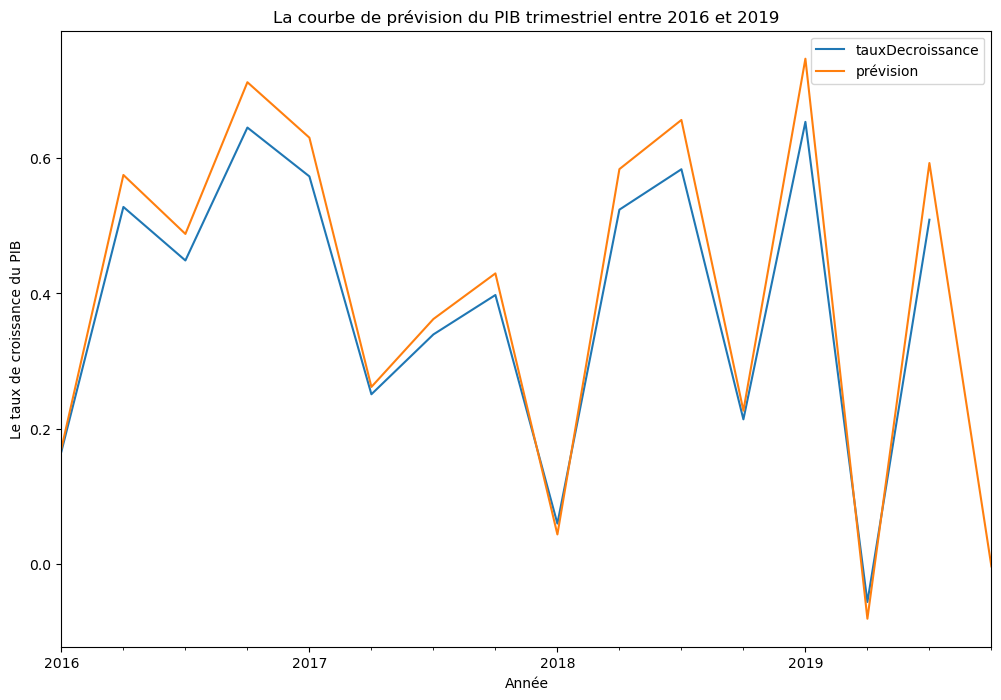

In [371]:
data_11['tauxDecroissance'].plot(figsize = (12,8), legend = True)
data_11['prévision'].plot(legend = True)
plt.xlabel("Année")
plt.ylabel("Le taux de croissance du PIB", y = 0.5)
plt.title("La courbe de prévision du PIB trimestriel entre 2016 et 2019", y = 1)
plt.draw()

In [372]:
mean_squared_error(data_reg_testn['Taux_Croissance_PIB'].fillna(0), ypred1)

0.0024362161975033723

## FIN